# **🍔 Estimation of obesity levels based on eating habits and physical condition**

## **Loading Data**

In [1]:
import pandas as pd

In [2]:
obesity_data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
obesity_data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## **Data cleaning**

In [5]:
obesity_data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

"object" type doesn't always mean that the data isn't a string, but let's make sure that it is to avoid errors later

In [6]:
obesity_data["Gender"]=obesity_data["Gender"].astype(str)
obesity_data["family_history_with_overweight"]=obesity_data["family_history_with_overweight"].astype(str)
obesity_data["FAVC"]=obesity_data["FAVC"].astype(str)
obesity_data["CAEC"]=obesity_data["CAEC"].astype(str)
obesity_data["SMOKE"]=obesity_data["SMOKE"].astype(str)
obesity_data["SCC"]=obesity_data["SCC"].astype(str)
obesity_data["CALC"]=obesity_data["CALC"].astype(str)
obesity_data["MTRANS"]=obesity_data["MTRANS"].astype(str)
obesity_data["NObeyesdad"]=obesity_data["NObeyesdad"].astype(str)

Now let's encode the data in "yes" and "no" form to boolean form

In [7]:
obesity_data["family_history_with_overweight"].unique

<bound method Series.unique of 0       yes
1       yes
2       yes
3        no
4        no
       ... 
2106    yes
2107    yes
2108    yes
2109    yes
2110    yes
Name: family_history_with_overweight, Length: 2111, dtype: object>

In [8]:
obesity_data["family_history_with_overweight"]=obesity_data["family_history_with_overweight"].apply(lambda x: True if x=="yes" else False)

In [9]:
obesity_data["FAVC"]=obesity_data["FAVC"].apply(lambda x: True if x=="yes" else False)

In [10]:
obesity_data["SMOKE"]=obesity_data["SMOKE"].apply(lambda x: True if x=="yes" else False)

In [11]:
obesity_data["SCC"]=obesity_data["SCC"].apply(lambda x: True if x=="yes" else False)

In [12]:
obesity_data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,True,False,2.0,3.0,Sometimes,False,2.0,False,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,True,False,3.0,3.0,Sometimes,True,3.0,True,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,True,False,2.0,3.0,Sometimes,False,2.0,False,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,False,False,3.0,3.0,Sometimes,False,2.0,False,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,False,False,2.0,1.0,Sometimes,False,2.0,False,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Let's see if there are null values in our dataframe

In [13]:
obesity_data_cleaned=obesity_data.dropna()

In [14]:
print(obesity_data_cleaned.shape, obesity_data.shape)

(2111, 17) (2111, 17)


We get the same value from both dataframes, which means that the original one doesn't include any null values. We can keep this one

Let's check if there are any extreme values in the columns with numeric data, using a boxplot

In [15]:
import seaborn as sns

In [16]:
obesity_data['Height'].describe()

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

C:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

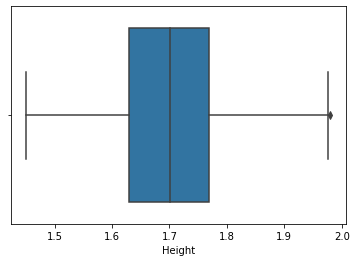

In [17]:
sns.boxplot(obesity_data['Height'])

In [18]:
obesity_data['Weight'].describe()

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

C:\Users\mathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

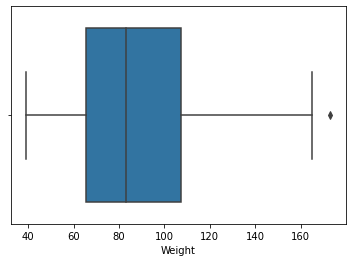

In [19]:
sns.boxplot(obesity_data['Weight'])

Now we will remove outliers using quantiles, even if these extreme values aren't false data, it can disturb the calculations

In [20]:
obesity_data_copy=obesity_data.copy()
cols = ['Height', 'Weight']

Q1, Q2 = obesity_data_copy[cols].quantile(0.25)['Height'], obesity_data_copy[cols].quantile(0.25)['Weight']
Q3, Q4 = obesity_data_copy[cols].quantile(0.75)['Height'], obesity_data_copy[cols].quantile(0.75)['Weight']
IQR1 = Q3 - Q1
IQR2 = Q4 - Q2

obesity_data_copy = obesity_data_copy[obesity_data_copy['Height'] > (Q1 - 1.5*IQR1)]
obesity_data_copy = obesity_data_copy[obesity_data_copy['Height'] < (Q3 + 1.5*IQR1)]
obesity_data_copy = obesity_data_copy[obesity_data_copy['Weight'] > (Q2 - 1.5*IQR2)]
obesity_data_copy = obesity_data_copy[obesity_data_copy['Weight'] < (Q4 + 1.5*IQR2)]
print(obesity_data_copy.shape,obesity_data.shape)


(2109, 17) (2111, 17)


We removed only 2 lines

In [21]:
obesity_data_copy.to_csv("ObesityDataSet_nooutliers.csv",index=False)

In [22]:
obesity_data=obesity_data_copy

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Weight values')

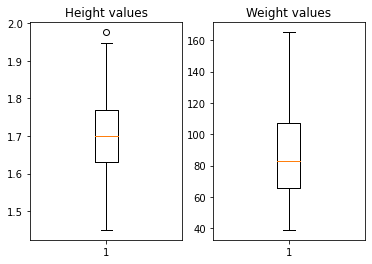

In [24]:
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(obesity_data["Height"])
axs[1].boxplot(obesity_data["Weight"])
axs[0].set_title("Height values")
axs[1].set_title("Weight values")


## **Data Analysis**

### **The features of the population**

**First of all, we are going to plot the repartition of the population studied to see the proportions.**

<AxesSubplot:ylabel='NObeyesdad'>

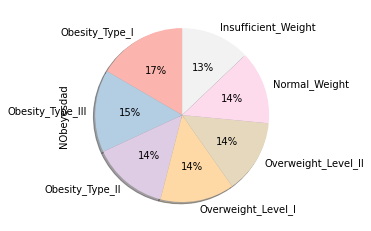

In [25]:
obesity_data['NObeyesdad'].value_counts().plot.pie(autopct='%1.0f%%',shadow=True, cmap="Pastel1", startangle = 90)

**This following graph represents the obesity status of individuals of the dataset according to their weight.**

Text(0.5, 1.0, 'Obesity according to the weight')

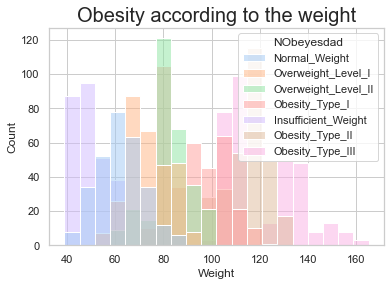

In [26]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.histplot(data = obesity_data, x = obesity_data['Weight'], hue = obesity_data['NObeyesdad'])
sns.set(rc = {'figure.figsize':(10,10)})
plt.title('Obesity according to the weight', fontsize=20)

Here we can see that type 3 obesity status is predominantly reported from 110 kg in general. We can tell from this graph that there is no declaration of obesity below about 90kg. The classification is impacted by the weight. 

**The next one represents the obesity status of individuals according to their height.**

Text(0.5, 1.0, 'Obesity according to the height')

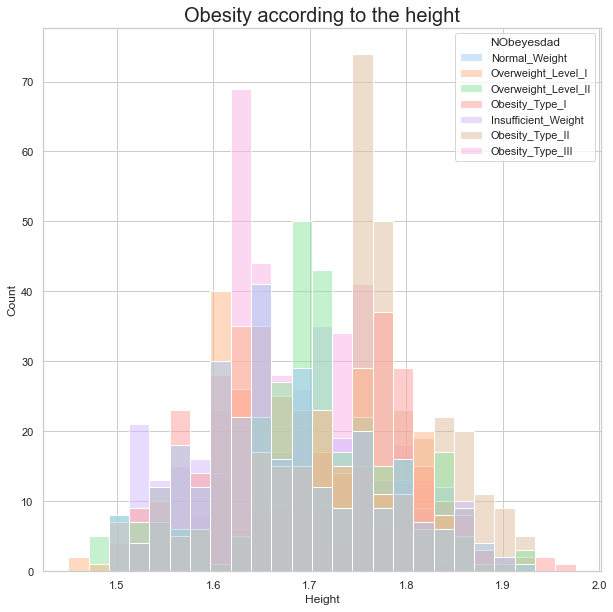

In [27]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.histplot(data = obesity_data, x = obesity_data['Height'], hue = obesity_data['NObeyesdad'])
sns.set(rc = {'figure.figsize':(10,10)})
plt.title('Obesity according to the height', fontsize=20)

It can be seen that the height variable has less impact on the classification, however a peak of type 3 obesity around 1m63 and type 2 obesity around 1m78 is still observed. 

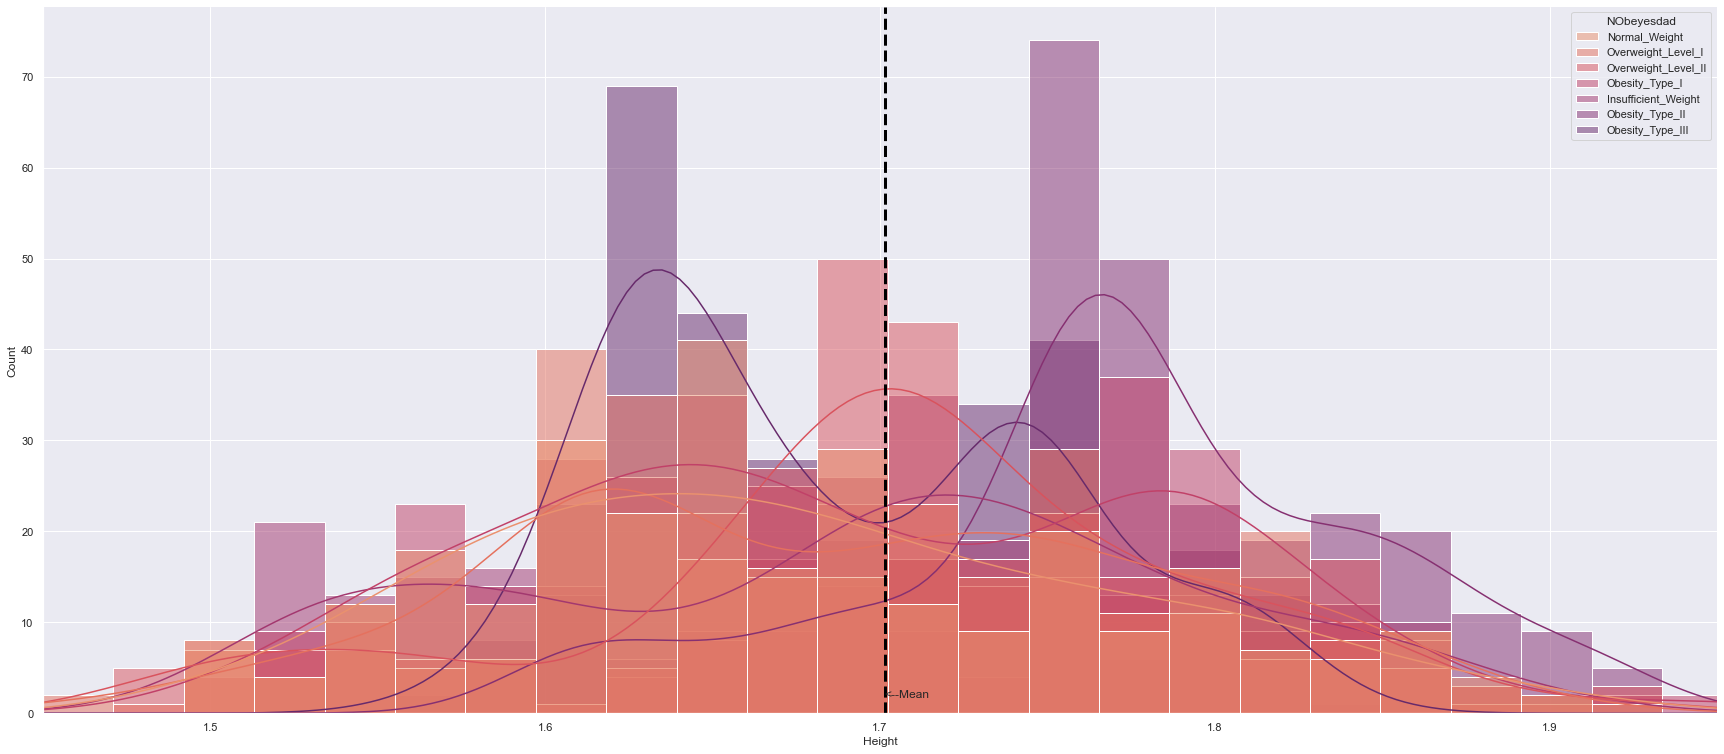

In [28]:
def super_plot(value, hue = 'NObeyesdad'):
    fig, ax = plt.subplots(1, 1, figsize=(30, 13))
    sns.histplot(x=value, hue=hue, data=obesity_data, kde=True, palette='flare')
    ax.axvline(x=obesity_data[value].mean(), color='black', linestyle='--', linewidth=3)
    ax.text(obesity_data[value].mean(), obesity_data[value].mean(), "<--Mean")
    if (value=="Height"):
        ax.set_xlim([1.45,1.95])
    elif value == 'Weight': 
        ax.set_xlim([39,166])
    else : 
        ax.set_xlim([14,62])

    sns.despine()

super_plot('Height')


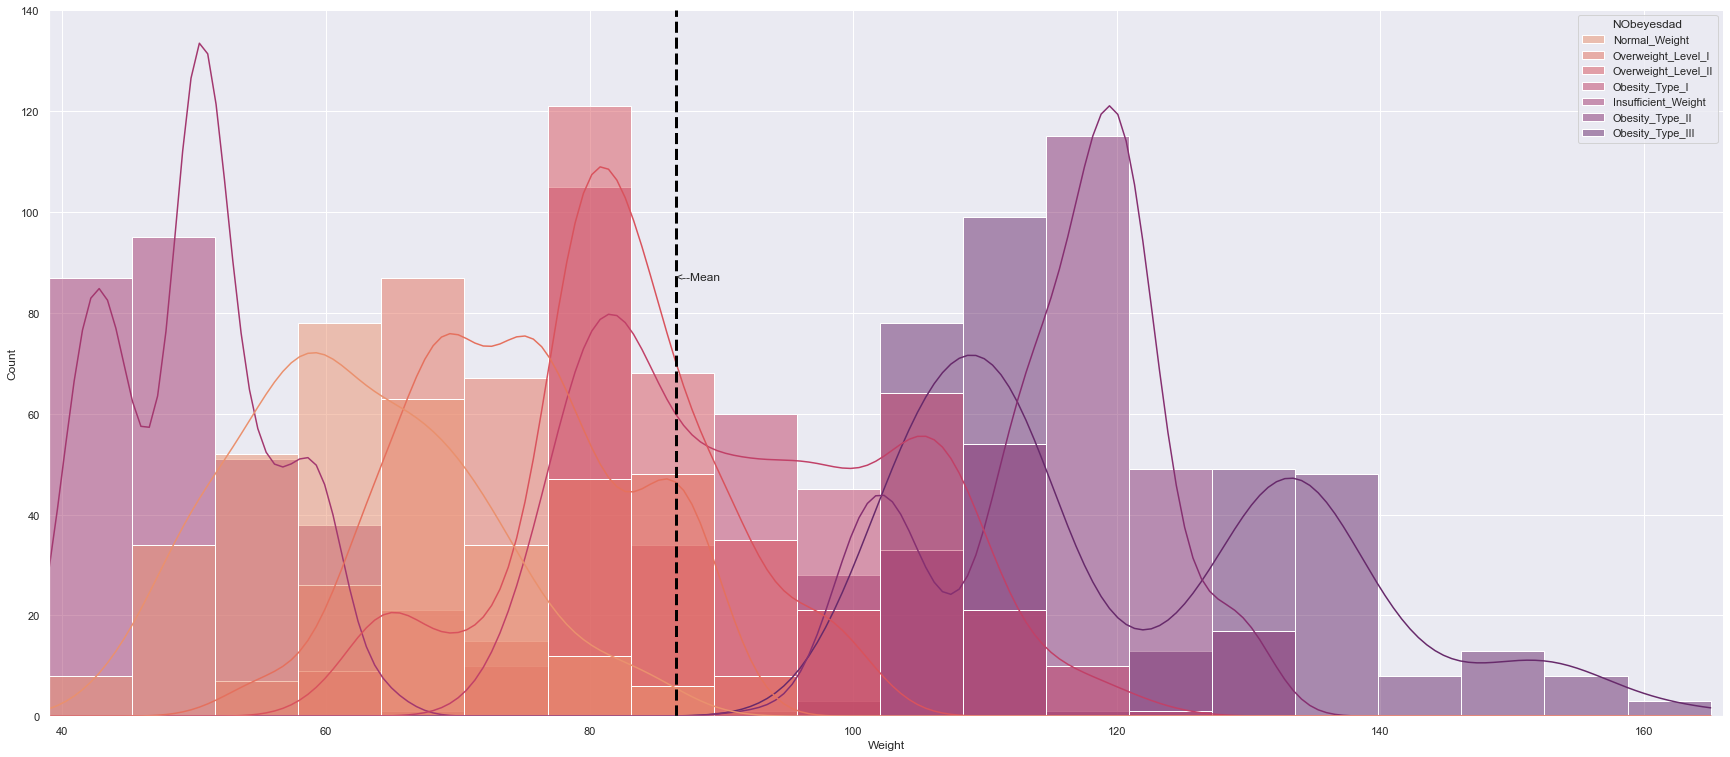

In [29]:
super_plot('Weight')

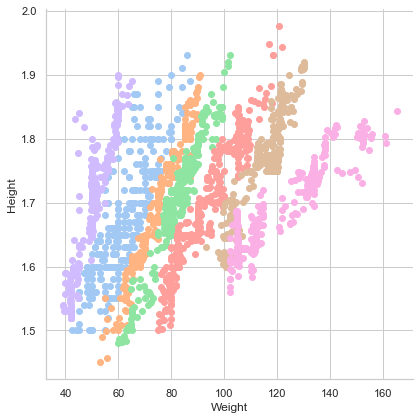

In [30]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.FacetGrid(obesity_data,hue="NObeyesdad",height=6).map(plt.scatter,"Weight","Height")

**The next one represents the obesity status of individuals according to their age.**

Text(0.5, 1.0, 'Obesity according to the age')

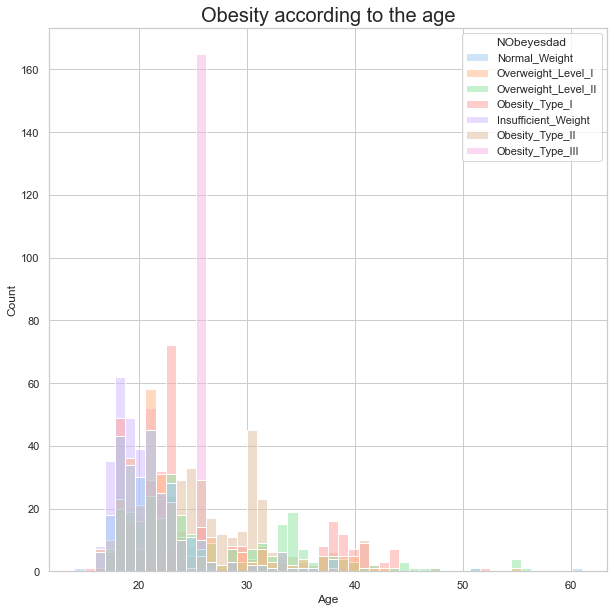

In [31]:
sns.set_theme(style='whitegrid', palette='pastel')
sns.histplot(data = obesity_data, x = obesity_data['Age'], hue = obesity_data['NObeyesdad'])
sns.set(rc = {'figure.figsize':(20,10)})
plt.title('Obesity according to the age', fontsize=20)

With the graph of the classification according to age, we observe a very large peak in the declaration of type 3 obesity at around 27 years of age: indeed, after this age there are no more declarations of this type of obesity, so we can conclude that the life expectancy of people with type 3 obesity is shorter than that of the other types of obesity.

**To complete this aspect of the study, we can focus us on the gender of the population where we can observe cases of obesity.**

Text(0.5, 1.0, 'Classification by gender')

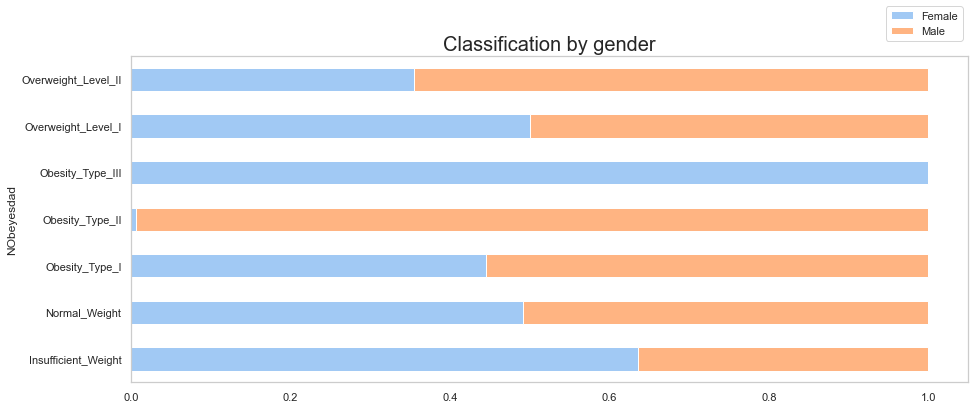

In [32]:
sns.set_theme(style='whitegrid', palette='pastel')
big_count = pd.crosstab(obesity_data['NObeyesdad'], obesity_data['Gender'])
big_pct = big_count.div(big_count.sum(1), axis=0)
big_pct.plot.barh(stacked=True, figsize=(15, 6), alpha=1, grid=False)
plt.legend(loc="right", bbox_to_anchor=(1, 1.1))
plt.title("Classification by gender", fontsize=20)

Here, we can see that there is more cases of obesity and overweight in men, excepted for the type III. And we can tell that the women are more affected by the insufficient weight. 
**To have a better view of the repartition between men and women in the cases of obesitiy (type I, II and III), we are going to plot a pie plot.**

Number of reported cases of obesity in women :  325 
Number of reported cases of obesity in men :  618


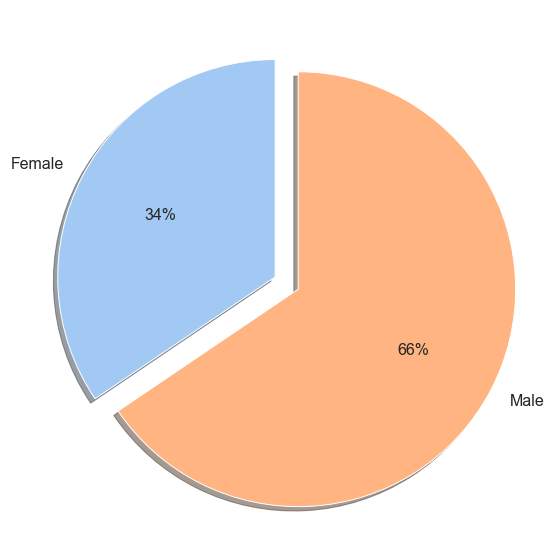

In [33]:
female_obesity = obesity_data[(obesity_data['Gender'] == 'Female') & (obesity_data['NObeyesdad'] == 'Obesity_Type_II') | (obesity_data['NObeyesdad'] == 'Obesity_Type_III')]
#print(female_obesity)
count_female = female_obesity['Gender'].count()

male_obesity = obesity_data[(obesity_data['Gender'] == 'Male') & (obesity_data['NObeyesdad'] == 'Obesity_Type_II') | (obesity_data['NObeyesdad'] == 'Obesity_Type_III')]
#print(male_obesity)
count_male = male_obesity['Gender'].count()

print('Number of reported cases of obesity in women : ', count_female, '\nNumber of reported cases of obesity in men : ', count_male)

data = [count_female,count_male]
explode = [0.02,0.1]
labels = ['Female','Male']
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%', startangle = 90, textprops = {'fontsize':16}, explode = explode, shadow = 'True')
plt.show()

As seen before, 66% of the population affected by obesity, all types combined, are men, which is twice as many as the female (34%).

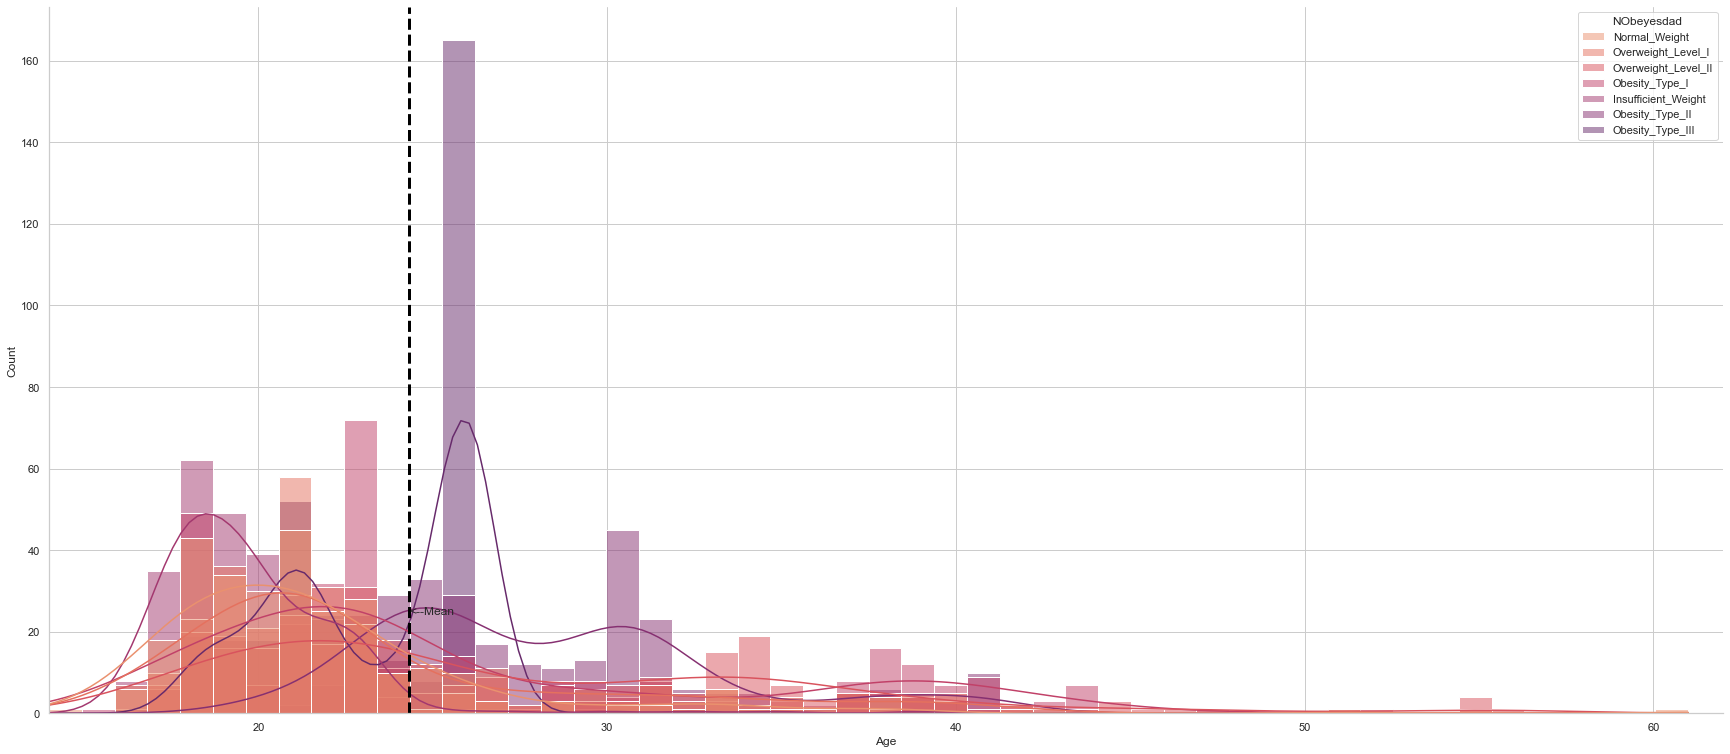

In [34]:
super_plot('Age')

**After seeing the age and the gender, it could be interesting to see the impact of the other variables as the family history with overweight.**

Text(0.5, 1.0, 'Classification (family history with overweight or not)')

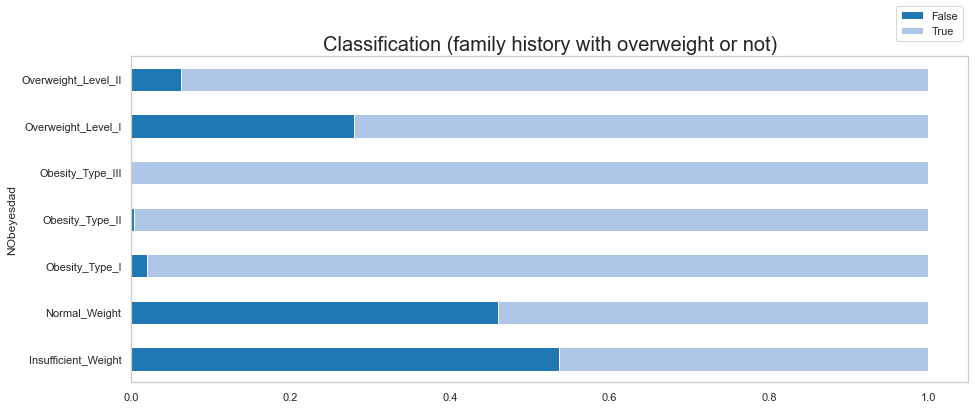

In [35]:
sns.set_theme(style='whitegrid', palette='tab20')
big_count = pd.crosstab(obesity_data['NObeyesdad'], obesity_data['family_history_with_overweight'])
big_pct = big_count.div(big_count.sum(1), axis=0)
big_pct.plot.barh(stacked=True, figsize=(15, 6), alpha=1, grid=False)
plt.legend(loc="right", bbox_to_anchor=(1, 1.1))
plt.title("Classification (family history with overweight or not)", fontsize=20)

This graph shows that the higher the level of obesity, the more likely it is that the subject has a family history of overweight. It is therefore a determining factor. 

### **Lifestyle of the population observed to know more about the consumption.**

**Let's first observe the frequency with which the study population eats between meals.**

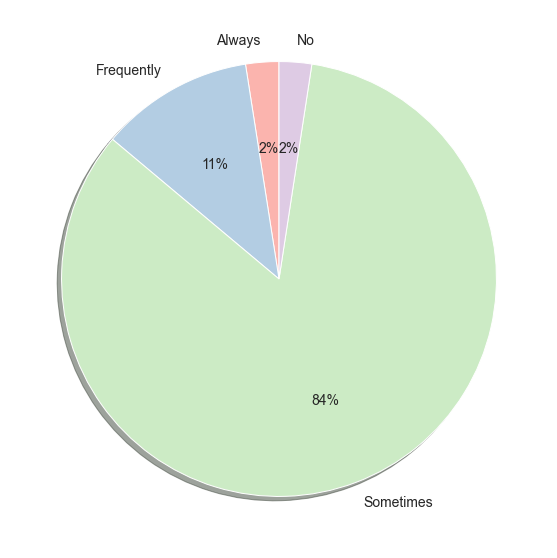

In [36]:
caec_always = obesity_data[(obesity_data['CAEC'] == 'Always')]
caec_freq = obesity_data[(obesity_data['CAEC'] == 'Frequently')]
caec_sometimes = obesity_data[(obesity_data['CAEC'] == 'Sometimes')]
caec_no = obesity_data[(obesity_data['CAEC'] == 'no')]

caec_a_c = caec_always['CAEC'].count()
caec_f_c = caec_freq['CAEC'].count()
caec_s_c = caec_sometimes['CAEC'].count()
caec_n_c = caec_no['CAEC'].count()


data = [caec_a_c, caec_f_c, caec_s_c, caec_n_c]
labels = ['Always', 'Frequently', 'Sometimes', 'No']
colors = sns.color_palette('Pastel1')
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%', startangle = 90, textprops = {'fontsize':14}, shadow = 'True')
plt.show()

Text(0.5, 1.0, 'Frequency of the population to eat between meals')

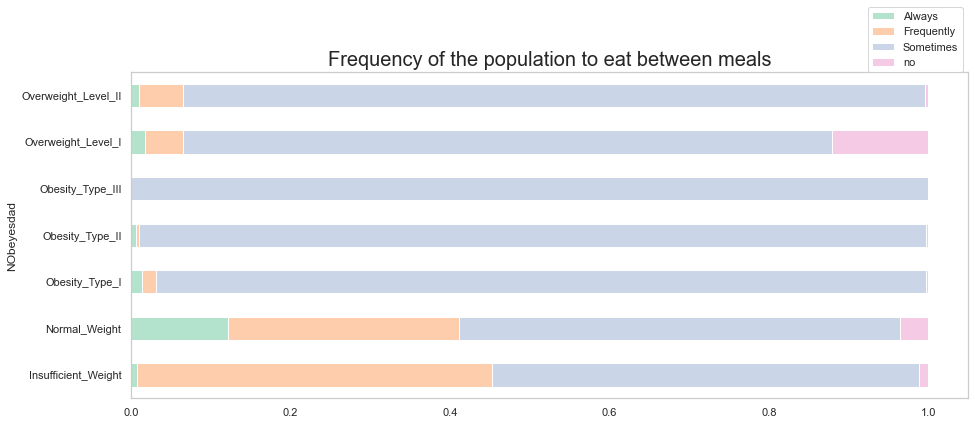

In [37]:
sns.set_theme(style='whitegrid', palette='Pastel2')
big_count = pd.crosstab(obesity_data['NObeyesdad'], obesity_data['CAEC'])
big_pct = big_count.div(big_count.sum(1), axis=0)
big_pct.plot.barh(stacked=True, figsize=(15, 6), alpha=1, grid=False)
plt.legend(loc="right", bbox_to_anchor=(1, 1.1))
plt.title("Frequency of the population to eat between meals", fontsize=20)

We notice that, contrary to what we might think, the people with the highest obesity status are the ones who eat the least between meals, and that it is the ones in normal or insufficient weight who eat the most.

**To study the lifestyle of the population, we can observe the impact of smoking.**

Text(0.5, 1.0, 'Classification (smoke or not)')

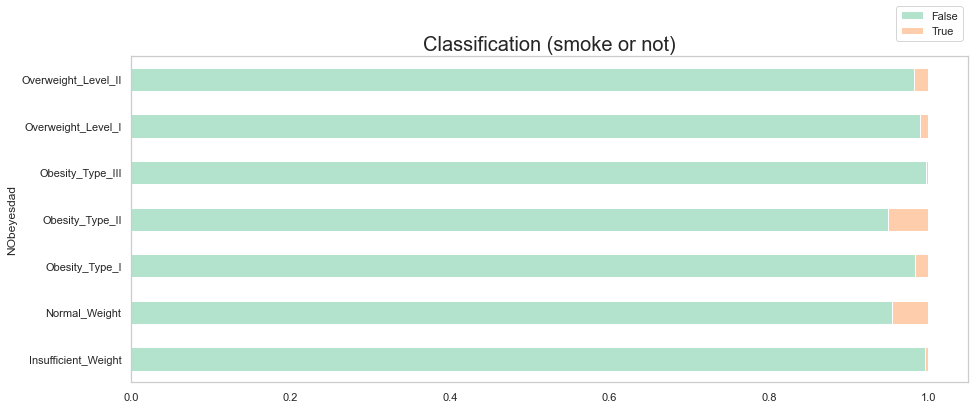

In [38]:
sns.set_theme(style='whitegrid', palette='Pastel2')
big_count = pd.crosstab(obesity_data['NObeyesdad'], obesity_data['SMOKE'])
big_pct = big_count.div(big_count.sum(1), axis=0)
big_pct.plot.barh(stacked=True, figsize=(15, 6), alpha=1, grid=False)
plt.legend(loc="right", bbox_to_anchor=(1, 1.1))
plt.title("Classification (smoke or not)", fontsize=20)

We notice in this graph that there are very few individuals who smoke, regardless of status. It is therefore not a factor to be taken into consideration. 

**Then the consumption of alcohol.**

Percentages
 Always :  0.05 
Frequently :  3 
Sometimes :  66 
No :  30


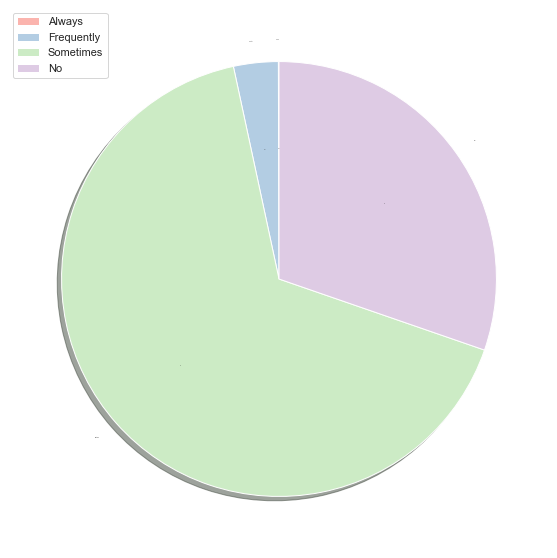

In [39]:
calc_always = obesity_data[(obesity_data['CALC'] == 'Always')]
calc_freq = obesity_data[(obesity_data['CALC'] == 'Frequently')]
calc_sometimes = obesity_data[(obesity_data['CALC'] == 'Sometimes')]
calc_no = obesity_data[(obesity_data['CALC'] == 'no')]

calc_a_c = calc_always['CALC'].count()
calc_f_c = calc_freq['CALC'].count()
calc_s_c = calc_sometimes['CALC'].count()
calc_n_c = calc_no['CALC'].count()
total_calc = calc_a_c + calc_f_c + calc_s_c + calc_n_c

print('Percentages\n', 'Always : ', round(calc_a_c*100/total_calc,2), '\nFrequently : ', round(calc_f_c*100/total_calc), '\nSometimes : ', round(calc_s_c*100/total_calc), '\nNo : ', round(calc_n_c*100/total_calc))

data = [calc_a_c, calc_f_c, calc_s_c, calc_n_c]
labels = ['Always', 'Frequently', 'Sometimes', 'No']
colors = sns.color_palette('Pastel1')
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%', startangle = 90, textprops = {'fontsize':0}, shadow = 'True')
plt.legend()
plt.show()

CALC
Always           1
Frequently      70
Sometimes     1399
no             639
Name: ID, dtype: int64


Text(0.5, 1.0, 'Alcohol consumption, by status')

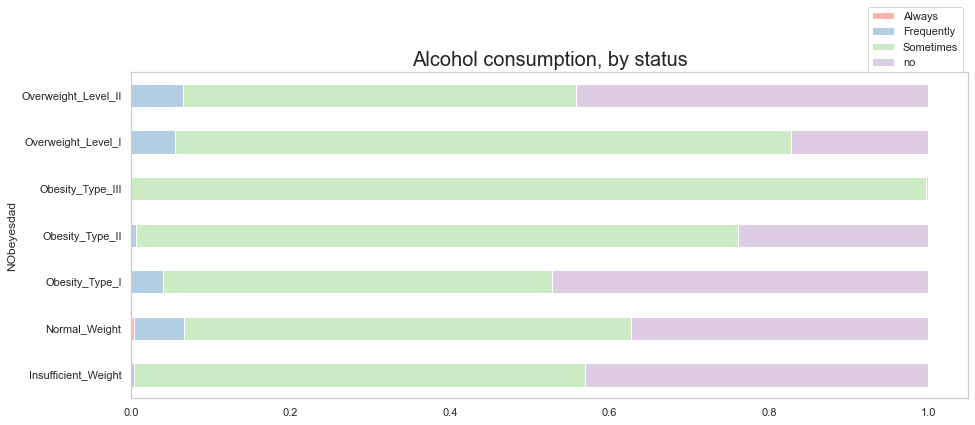

In [40]:
obesity_data['CALC']
alcool_data=obesity_data.assign(ID=list(range(2109)))
alcool = alcool_data.groupby('CALC')['ID'].nunique()
print(alcool) 

sns.set_theme(style='whitegrid', palette='Pastel1')
big_count = pd.crosstab(obesity_data['NObeyesdad'], obesity_data['CALC'])
big_pct = big_count.div(big_count.sum(1), axis=0)
big_pct.plot.barh(stacked=True, figsize=(15, 6), alpha=1, grid=False)
plt.legend(loc="right", bbox_to_anchor=(1, 1.1))
plt.title("Alcohol consumption, by status", fontsize=20)

It can be deduced from this graph that the more important the type of overweight or obesity, the less frequently people consume. The proof is in the type III.

**Let's see the transports that are taken by the people and let's see if this variable is important.**

MTRANS
Automobile                457
Bike                        7
Motorbike                  11
Public_Transportation    1578
Walking                    56
Name: ID, dtype: int64


Text(0.5, 1.0, 'Classification by transports')

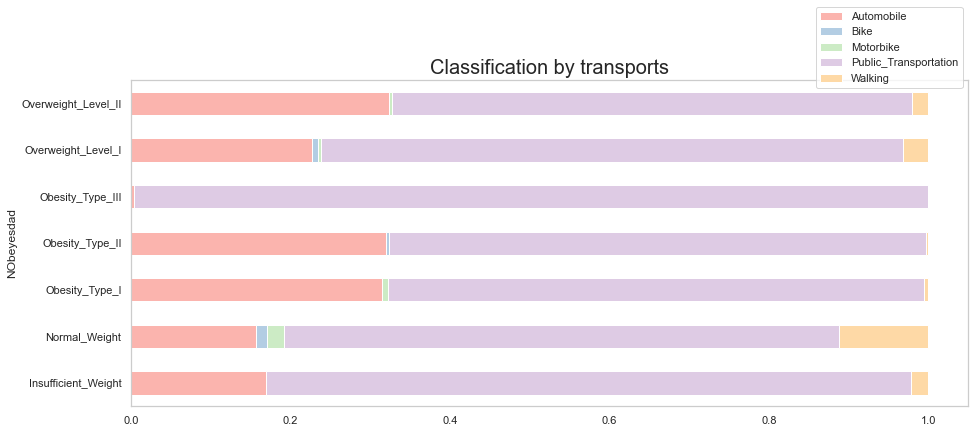

In [41]:
mtransport_data=obesity_data.assign(ID=list(range(2109)))
#mtransport_data['MTRANS']
mtransports = mtransport_data.groupby('MTRANS')['ID'].nunique()
print(mtransports)

sns.set_theme(style='whitegrid', palette='Pastel1')
big_count = pd.crosstab(obesity_data['NObeyesdad'], obesity_data['MTRANS'])
big_pct = big_count.div(big_count.sum(1), axis=0)
big_pct.plot.barh(stacked=True, figsize=(15, 6), alpha=1, grid=False)
plt.legend(loc="right", bbox_to_anchor=(1, 1.1))
plt.title("Classification by transports", fontsize=20)

We can observe that the most taken transport is the public transport and that the car comes after. The people that are in the obesity type III case only take the public transport and don't use the physical transports. 

### **A more general view**

<AxesSubplot:>

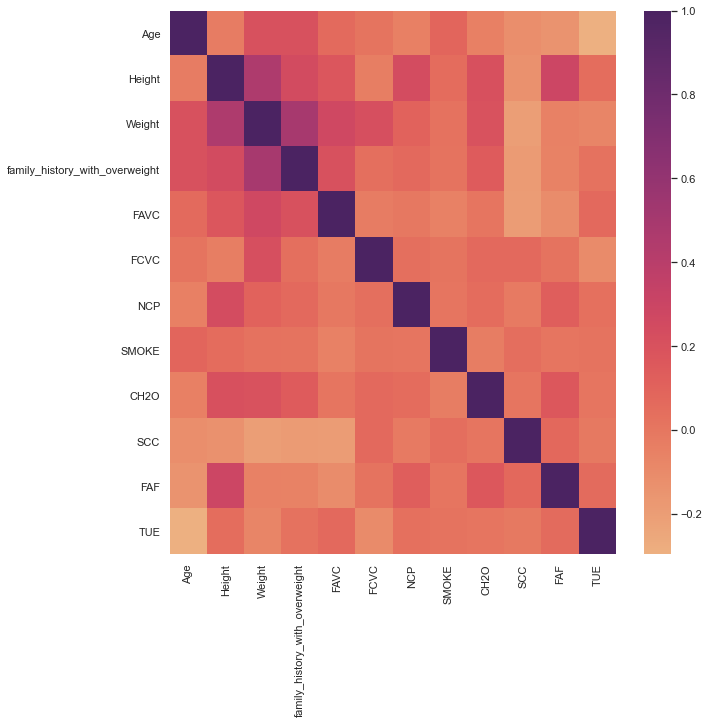

In [42]:
plt.subplots(figsize = (10,10))
sns.heatmap(obesity_data.corr(), cmap = 'flare')

**This heatmap confirms our previous observations: indeed, the most significant variables in this dataset are weight, height and family history. These three variables are significant indicators of obesity.**

## **Data cleaning for modeling**

After analyzing our data, we are going to clean it by converting our string variables to numerical variables.

In [43]:
import numpy as np

In [44]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2109 non-null   object 
 1   Age                             2109 non-null   float64
 2   Height                          2109 non-null   float64
 3   Weight                          2109 non-null   float64
 4   family_history_with_overweight  2109 non-null   bool   
 5   FAVC                            2109 non-null   bool   
 6   FCVC                            2109 non-null   float64
 7   NCP                             2109 non-null   float64
 8   CAEC                            2109 non-null   object 
 9   SMOKE                           2109 non-null   bool   
 10  CH2O                            2109 non-null   float64
 11  SCC                             2109 non-null   bool   
 12  FAF                             21

The columns with the "object" are columns with string variables in them. Let's see their different values

In [45]:
string_cols = ['Gender','CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
for i in string_cols:
    print(obesity_data[i].unique())

['Female' 'Male']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Now let's encode these values by giving each of them a numeric value

In [46]:
obesity_data_cleaned = obesity_data.copy()

In [47]:
obesity_data_cleaned['Gender'] = obesity_data_cleaned['Gender'].apply(lambda x: 0 if x=='Female' else 1)
obesity_data_cleaned['CAEC'] = obesity_data_cleaned['CAEC'].apply(lambda x: 0 if x=='Sometimes' else (1 if x=='Frequently' else (2 if x=='Always' else 4)))
obesity_data_cleaned['CALC'] = obesity_data_cleaned['CALC'].apply(lambda x: 0 if x=='no' else (1 if x=='Sometimes' else (2 if x=='Frequently' else 4)))
obesity_data_cleaned['MTRANS'] = obesity_data_cleaned['MTRANS'].apply(lambda x: 0 if x=='Public_Transportation' else (1 if x=='Walking' else (2 if x=='Automobile' else (4 if x=='Motorbike' else 5))))
obesity_data_cleaned['NObeyesdad'] = obesity_data_cleaned['NObeyesdad'].apply(lambda x: 0 if x=='Normal_Weight' else (1 if x=='Overweight_Level_I' else (2 if x=='Overweight_Level_II' else (3 if x=='Obesity_Type_I' else (4 if x=='Insufficient_Weight' else (5 if x=='Obesity_Type_II' else 6))))))


We previously converted 'Yes' 'No' variables to boolean variables, so let's encode them too

In [48]:
bool_cols=['family_history_with_overweight','FAVC','SMOKE','SCC']
for i in bool_cols:
      obesity_data_cleaned[i]=obesity_data_cleaned[i].apply(lambda x: 1 if x==True else 0)
obesity_data_cleaned.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,2


In [49]:
obesity_data_cleaned.to_csv("ObesityDataSet_cleaned.csv",index=False)

## **Data Processing**

### **Data normalization**

We're going to do a normalization of our dataset as some models need the data to be formatted

In [50]:
import sklearn as skl
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import StratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb

In [51]:
obesity_data_norm = obesity_data_cleaned.drop(columns='NObeyesdad')
scaler = preprocessing.StandardScaler().fit(obesity_data_norm)
obesity_data_scaled = pd.DataFrame(scaler.transform(obesity_data_norm))
obesity_data_scaled['NObesity'] = obesity_data_cleaned['NObeyesdad']
obesity_data_scaled.columns = obesity_data_cleaned.columns.to_list()
obesity_data_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.010966,-0.522851,-0.875432,-0.862561,0.472565,-2.75829,-0.784838,0.404376,-0.356879,-0.145971,-0.012314,-0.218380,-1.187312,0.562347,-1.412150,-0.551860,0.0
1,-1.010966,-0.522851,-1.950036,-1.168884,0.472565,-2.75829,1.088434,0.404376,-0.356879,6.850680,1.619759,4.579165,2.339939,-1.079742,0.518002,-0.551860,0.0
2,0.989153,-0.207656,1.058855,-0.364787,0.472565,-2.75829,-0.784838,0.404376,-0.356879,-0.145971,-0.012314,-0.218380,1.164189,0.562347,2.448154,-0.551860,0.0
3,0.989153,0.422733,1.058855,0.018116,-2.116110,-2.75829,1.088434,0.404376,-0.356879,-0.145971,-0.012314,-0.218380,1.164189,-1.079742,2.448154,0.557647,1.0
4,0.989153,-0.365253,0.843934,0.125329,-2.116110,-2.75829,-0.784838,-2.165781,-0.356879,-0.145971,-0.012314,-0.218380,-1.187312,-1.079742,0.518002,-0.551860,2.0


In [52]:
obesity_data_scaled.to_csv("ObesityDataSet_scaled.csv",index=False)

## **Modeling**

### **Splitting the data**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [54]:
train_test_dataset = obesity_data_scaled.drop(columns="NObeyesdad")

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(train_test_dataset, obesity_data['NObeyesdad'])

<AxesSubplot:xlabel='NObeyesdad', ylabel='Count'>

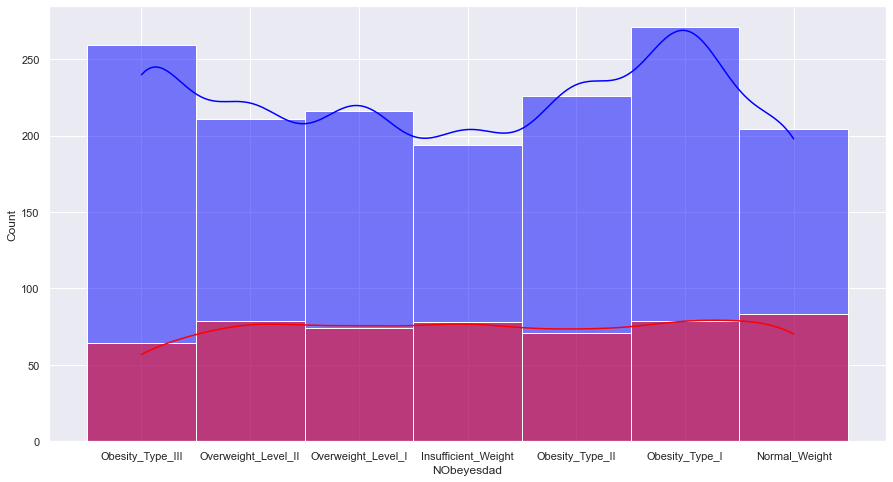

In [56]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(Y_train, kde=True, color="blue")
sns.histplot(Y_test, kde=True, color="red")


We verified that the training and testing datasets were well split, so we can now fit a model to the data

### **Models**

We are going to fit many models on our data, and compute their accuracy in order to evaluate the most accurate model and use it to make our predictions.

In [57]:
models_acc=dict()

### **Logistic Regression**

In [58]:
log_reg=LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Users\mathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred=log_reg.predict(X_test)

In [60]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

[[76  2  0  0  0  0  0]
 [ 9 57  0  0  0 16  1]
 [ 0  0 73  5  0  1  0]
 [ 0  0  1 70  0  0  0]
 [ 0  0  1  0 63  0  0]
 [ 0  2  0  0  0 63  9]
 [ 0  0 13  1  0  7 58]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.97      0.93        78
      Normal_Weight       0.93      0.69      0.79        83
     Obesity_Type_I       0.83      0.92      0.87        79
    Obesity_Type_II       0.92      0.99      0.95        71
   Obesity_Type_III       1.00      0.98      0.99        64
 Overweight_Level_I       0.72      0.85      0.78        74
Overweight_Level_II       0.85      0.73      0.79        79

           accuracy                           0.87       528
          macro avg       0.88      0.88      0.87       528
       weighted avg       0.88      0.87      0.87       528

0.8712121212121212


In [61]:
models_acc['Logistic Regression'] = accuracy_score(Y_test,y_pred)

### **Gradient Boosting Classifier**

In [62]:
GradBoost = GradientBoostingClassifier(random_state=123)
GradBoost.fit(X_train,Y_train)
y_pred = GradBoost.predict(X_test)

In [63]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

[[77  1  0  0  0  0  0]
 [ 0 77  0  0  0  6  0]
 [ 0  0 78  1  0  0  0]
 [ 0  0  0 71  0  0  0]
 [ 0  0  0  0 64  0  0]
 [ 0  2  0  0  0 72  0]
 [ 0  0  1  0  0  1 77]]
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.99      0.99        78
      Normal_Weight       0.96      0.93      0.94        83
     Obesity_Type_I       0.99      0.99      0.99        79
    Obesity_Type_II       0.99      1.00      0.99        71
   Obesity_Type_III       1.00      1.00      1.00        64
 Overweight_Level_I       0.91      0.97      0.94        74
Overweight_Level_II       1.00      0.97      0.99        79

           accuracy                           0.98       528
          macro avg       0.98      0.98      0.98       528
       weighted avg       0.98      0.98      0.98       528

0.9772727272727273


In [64]:
models_acc['Gradient Boosting Classifier'] = accuracy_score(Y_test,y_pred)

### **K-Nearest Neighbours**

To fit the most accurate KNN model, we need to compute the number of neighbours which the KNN is the most accurate with, so we are going to do a for loop to test different options and see which is the most accurate

In [65]:
perf = []
for j in range(0,10):
    for i in range(2,10):
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(X_train,Y_train)
        KNN_pred=KNN.predict(X_test)
        perf.append([i,accuracy_score(Y_test,KNN_pred)])
perf=sorted(perf, key=lambda x:x[1], reverse=True)
print(perf)

[[2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [2, 0.8049242424242424], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [3, 0.7935606060606061], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [4, 0.7840909090909091], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909], [7, 0.7784090909090909],

We can conclude that the KNN is the most accurate with 2 neighbours





In [66]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train,Y_train)
y_pred=KNN.predict(X_test)

In [67]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

[[76  2  0  0  0  0  0]
 [21 41  6  1  0  8  6]
 [ 2  1 74  2  0  0  0]
 [ 0  0  3 66  0  0  2]
 [ 0  0  0  0 63  1  0]
 [ 2  5  9  2  0 55  1]
 [ 1  2 12  7  0  7 50]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.97      0.84        78
      Normal_Weight       0.80      0.49      0.61        83
     Obesity_Type_I       0.71      0.94      0.81        79
    Obesity_Type_II       0.85      0.93      0.89        71
   Obesity_Type_III       1.00      0.98      0.99        64
 Overweight_Level_I       0.77      0.74      0.76        74
Overweight_Level_II       0.85      0.63      0.72        79

           accuracy                           0.80       528
          macro avg       0.82      0.81      0.80       528
       weighted avg       0.81      0.80      0.80       528

0.8049242424242424


In [68]:
models_acc['K-Nearest Neighbors'] = accuracy_score(Y_test,y_pred)

### **Support Vector Machine**

In [69]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [70]:
scores=cross_val_score(clf,X_train,Y_train,cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.85804416 0.87974684 0.86392405 0.84810127 0.87974684]
0.87 accuracy with a standard deviation of 0.01


In [71]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred))
models_acc['Support Vector Machine']=accuracy_score(Y_test, y_pred)

[[72  6  0  0  0  0  0]
 [ 5 63  0  0  0  9  6]
 [ 0  2 75  1  0  1  0]
 [ 0  1  2 68  0  0  0]
 [ 0  0  1  0 63  0  0]
 [ 0  7  2  0  0 63  2]
 [ 0  2  8  0  0 10 59]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.92      0.93        78
      Normal_Weight       0.78      0.76      0.77        83
     Obesity_Type_I       0.85      0.95      0.90        79
    Obesity_Type_II       0.99      0.96      0.97        71
   Obesity_Type_III       1.00      0.98      0.99        64
 Overweight_Level_I       0.76      0.85      0.80        74
Overweight_Level_II       0.88      0.75      0.81        79

           accuracy                           0.88       528
          macro avg       0.88      0.88      0.88       528
       weighted avg       0.88      0.88      0.88       528

0.8768939393939394


### **Random Forest**


In [72]:
RandF = RandomForestClassifier(n_estimators = 500)
RandF.fit(X_train, Y_train)
y_pred=RandF.predict(X_test)

In [73]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))

[[76  2  0  0  0  0  0]
 [ 0 76  0  0  0  4  3]
 [ 0  1 78  0  0  0  0]
 [ 0  0  0 71  0  0  0]
 [ 0  0  0  0 64  0  0]
 [ 0  2  0  0  0 72  0]
 [ 0  1  5  0  0  1 72]]
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.97      0.99        78
      Normal_Weight       0.93      0.92      0.92        83
     Obesity_Type_I       0.94      0.99      0.96        79
    Obesity_Type_II       1.00      1.00      1.00        71
   Obesity_Type_III       1.00      1.00      1.00        64
 Overweight_Level_I       0.94      0.97      0.95        74
Overweight_Level_II       0.96      0.91      0.94        79

           accuracy                           0.96       528
          macro avg       0.97      0.97      0.97       528
       weighted avg       0.96      0.96      0.96       528

0.9640151515151515


In [74]:
models_acc['Random Forest']=accuracy_score(Y_test,y_pred)

### **XGboost**

In [75]:
dict_NObeyesdad={'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
       'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,
       'Obesity_Type_III':6}
Y_testN=Y_test.replace(dict_NObeyesdad)
Y_trainN=Y_train.replace(dict_NObeyesdad)

In [76]:
XGBoost = XGBClassifier()
XGBoost.fit(X_train, Y_trainN)
y_pred=XGBoost.predict(X_test)

In [77]:
print(confusion_matrix(Y_testN,y_pred))
print(classification_report(Y_testN,y_pred))
print(accuracy_score(Y_testN, y_pred))

[[78  5  0  0  0  0  0]
 [ 1 73  0  0  0  0  0]
 [ 1  1 74  3  0  0  0]
 [ 0  0  0 79  0  0  0]
 [ 2  0  0  0 76  0  0]
 [ 0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        83
           1       0.92      0.99      0.95        74
           2       1.00      0.94      0.97        79
           3       0.96      1.00      0.98        79
           4       1.00      0.97      0.99        78
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        64

    accuracy                           0.98       528
   macro avg       0.98      0.98      0.98       528
weighted avg       0.98      0.98      0.98       528

0.9753787878787878


In [78]:
models_acc['XGBoost']=accuracy_score(Y_testN, y_pred)

### **The best prediction models**

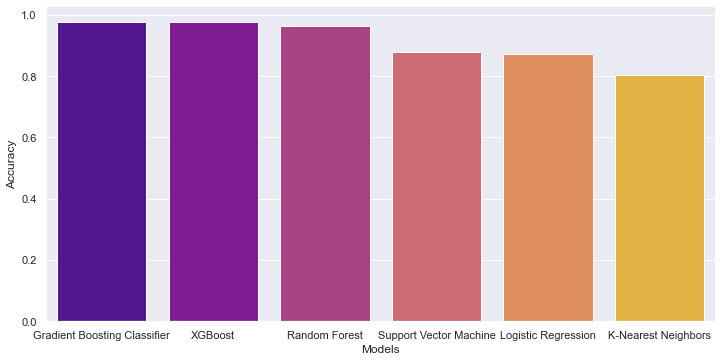

In [79]:
models_acc={k: v for k, v in sorted(models_acc.items(), key=lambda item: item[1], reverse=True)}
models_acc_df=pd.DataFrame([models_acc]).transpose().reset_index().rename(columns={0:'Accuracy','index':'Models'})
sns.catplot(data=models_acc_df, x="Models", y="Accuracy", hue="Models", kind="bar", height=5, aspect=2, palette='plasma', dodge=False)

We can conclude that the most accurate model is the XGBoost model

## **Transformation of the model into an API** 

##### We are going to transform the XGBoost model into an API so that people can see if they might suffer from obesity

In [80]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

<ipython-input-80-3babe439d14c>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-80-3babe439d14c>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [81]:
def predict_value(n_clicks,age,gender,height,weight,family_history_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans):   
    #uploading the scaled data we saved to csv
    obesity_data=pd.read_csv("ObesityDataSet_nooutliers.csv")
    obesity_data_scaled = pd.read_csv("ObesityDataSet_scaled.csv")
    #splitting the data to train and test datasets
    X_train, X_test, Y_train, Y_test = train_test_split(obesity_data_scaled.drop(columns="NObeyesdad"), obesity_data['NObeyesdad'])
    dict_NObeyesdad={'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
       'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,
       'Obesity_Type_III':6}
    Y_testN=Y_test.replace(dict_NObeyesdad)
    Y_trainN=Y_train.replace(dict_NObeyesdad)    
    #training the IA, fitting the model
    XGBoost = XGBClassifier()
    XGBoost.fit(X_train, Y_trainN)
    #collecting the data from the API answers and encoding it for machine learning
    data = pd.DataFrame([[gender,age,height,weight,family_history_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,
                               calc,mtrans]])
    data.columns = train_test_dataset.columns
    dict_Gender = {'Female' : 0, 'Male' : 1}
    dict_family_history_with_overweight = {'no' : 0, 'yes' : 1}
    dict_FAVC = {'no' : 0, 'yes' : 1}
    dict_FCVC = {'Never' : 1, 'Sometimes' : 2, 'Always' : 3}
    dict_CAEC = {'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}
    dict_SMOKE = {'no' : 0, 'yes' : 1}
    dict_SCC = {'no' : 0, 'yes' : 1}
    dict_CALC = {'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}
    dict_MTRANS = {'Public_Transportation' : 0, 'Walking' : 1, 'Automobile' : 2, 'Motorbike' :3,'Bike':4}
    dict_NCP = {'Between 1 and 2' : 1, '3' : 3, 'more than 3' : 4}
    dict_FAF = {'I do not have' : 0, '1 or 2 days' : 1, '2 or 4 days' : 2, '4 or 5 days' : 3}
    dict_TUE = {'0–2 hours' : 0, '3–5 hours' : 1, 'More than 5 hours' : 2}
    dict_CH2O = {'Less than a liter' : 0, 'Between 1 and 2 L' : 1, 'More than 2 L' : 2}
    cols = ['Gender', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']
    for x in cols:
         exec("data['"+ x +"'] = data['"+ x +"'].replace(dict_"+ x +")")
    print(data)
    #scaling the collected data for machine learning
    obesity_data_cleanedbeforescaling=pd.read_csv("ObesityDataSet_cleaned.csv")
    dataset = pd.concat([obesity_data_cleanedbeforescaling.drop(columns='NObeyesdad'),data], ignore_index=True)
    scaler = preprocessing.StandardScaler().fit(dataset)
    obesity_data_scaled = pd.DataFrame(scaler.transform(dataset))
    print(obesity_data_scaled.columns, dataset.columns)
    obesity_data_scaled.columns = dataset.columns.to_list()
    pred = XGBoost.predict(dataset.tail(1))
    dict_NObeyesdad = {'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,'Obesity_Type_I':3,'Insufficient_Weight':4,'Obesity_Type_II':5,'Obesity_Type_I':6}
    for key,val in dict_NObeyesdad.items():
        if pred[0]==val:
            prediction=key
    return prediction

In [82]:
pred = ''
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Estimation of obesity levels", 
            style={ 'textAlign' : 'center', 'color':'#008080', 'margin': '1em 0 0.5em 0', 'font-weight': 'normal',
                   'font-family': 'Ultra, sans-serif', 'font-size': '36px', 'line-height': '42px', 
                   'text-transform': 'uppercase', 'text-shadow': '0 2px white, 0 3px #777' }
            ),
    html.Div(children='We are going to ask you some questions to try and define the odds of you being obese and the level of obesity that touches or will touch you. Please fill in the following informations :', 
             style={'textAlign': 'center', 'margin-top':'30px', 'margin-bottom':'10px', 'font-family':'Garamond', 'font-weight':'600'}
            ),
    html.Div(children='Gender', 
             style={'textAlign': 'left','margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['Male', 'Female'], 'Choose a gender', id='gender',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]
        ),
    html.Div(children='Age', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Input(
            type="number", id='age',
            placeholder="Number corresponding".format("number"),
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
        )
    ]),
    html.Div(children='Height', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Input(
            type="number", id='height',
            placeholder="Ex : 1.72".format("number"),
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
        )
    ]),
    html.Div(children='Weight', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Input(
            type="number", id='weight',
            placeholder="In kg".format("number"),
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
        )
    ]),
    html.Div(children='Is or has a family member already been overweight ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['yes', 'no'], 'Yes or No', id='family_history_overweight',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Div(children='Do you consider your diet highly caloric ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['yes', 'no'], 'Yes or No', id='favc',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Div(children='Do you usually eat vegetables in your meals ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['Never', 'Sometimes', 'Always'], 'Choose a frequency', id='fcvc',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Div(children='How many meals do you have daily ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Input(
            type="number", id='ncp',
            placeholder="Number corresponding".format("number"),
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
        )
    ]),
    html.Div(children='Do you eat any food (snacks) between meals ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['no', 'Sometimes', 'Frequently', 'Always'], 'Choose a frequency', id='caec',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Div(children='Do you smoke ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['yes', 'no'], 'Yes or No', id='smoke',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Div(children='How much water do you drink daily ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Input(
            type="number", id='ch2o',
            placeholder="Estimation of the quantity in L".format("number"),
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
        )
    ]),
    html.Div(children='Do you follow the calories you ingest daily ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['yes', 'no'], 'Yes or No', id='scc',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Div(children='How often do you have a physical activity weekly ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Input(
            type="number", id='faf',
            placeholder="Number of times".format("number"),
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
        )
    ]),
    html.Div(children='How many hours do you use technical devices per day (phone, computer, game console) ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Input(
            type="number", id='tue',
            placeholder="Time estimation in hour".format("number"),
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
        )
    ]),
    html.Div(children='Do you frequently drink alcohol ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['no', 'Sometimes', 'Frequently', 'Always'], 'Choose an answer', id='calc',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Div(children='Which transportation do you usually use ?', 
             style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
            ),
    html.Div(
    [
        dcc.Dropdown(['Automobile', 'Motorbike', 'Bike', 'Public_Transportation','Walking'], 'Choose a transportation', 
                     id='mtrans',
            style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'border': '2px #008080', 'box-shadow': '0 0 3px black',
                   'border-radius': '0px', 'background-color': 
                   '#faf0e6', 'color': 'black', 'font-size': '12px', 'textAlign':'center'}
                    )
    ]),
    html.Button(type='submit', id='compute_btn', n_clicks=0,
               style={'width': '250px', 'height': '30px', 
                   'cursor': 'pointer', 'background-color': '#008080',
                   'color': '#faf0e6', 'font-size': '12px', 'textAlign':'center', 'margin-top':'30px', 
                   'border-radius':'40px', 'font-weight':'bold'},
                children='Compute'
                    ),
    html.Div(children =[
         html.H3(children = 'Estimation of overweigth :'),
         html.P(
         id = 'prediction',
         children = pred,
         style={'textAlign': 'left', 'margin-top':'30px', 'margin-bottom':'10px'}
         )
         ])
    ],
    style={'background-color':'#faf0e6', 'margin': '0px', 'padding': '30px'}
)
# Define callback to update graph
@app.callback(
     Output('prediction', 'children'),
     Input('compute_btn', 'n_clicks'),
     State('age', 'value'),
     State('gender', 'value'),
     State('height', 'value'),
     State('weight', 'value'),
     State('family_history_overweight', 'value'),
     State('favc', 'value'),
     State('fcvc', 'value'),
     State('ncp', 'value'),
     State('caec', 'value'),
     State('smoke', 'value'),
     State('ch2o', 'value'),
     State('scc', 'value'),
     State('faf', 'value'),
     State('tue', 'value'),
     State('calc', 'value'),
     State('mtrans', 'value')
)
def prediction(n_clicks,age,gender,height,weight,family_history_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans):
    pred = predict_value(n_clicks,age,gender,height,weight,family_history_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans)
    return pred

# Run app and display result inline in the notebook
app.run_server(debug=False)

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Dec/2022 19:45:38] "GET /_alive_353df8f6-af73-4a09-9037-b5ac2da32eb4 HTTP/1.1" 200 -


Dash app running on http://127.0.0.1:8050/
